# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#%matplotlib notebook
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
#pd.set_option('display.max_rows', 500)

# Ingest Data  

In [342]:
df = pd.read_excel("World military power.xlsx",header=[0,1])
df

2020 ranking                               Airforce Strength  \
    Military Strength Military Strength Power Index Aircraft Strength   
0         Afghanistan                        1.3444       Afghanistan   
1             Albania                        2.3137           Albania   
2             Algeria                        0.4659           Algeria   
3              Angola                        0.8379            Angola   
4           Argentina                        0.6521         Argentina   
..                ...                           ...               ...   
133         Venezuela                        0.6449         Venezuela   
134           Vietnam                        0.3559           Vietnam   
135             Yemen                        1.2412             Yemen   
136            Zambia                        1.6464            Zambia   
137          Zimbabwe                        1.7577          Zimbabwe   

                                                          \
    Aircraft Strength value Fighter/Interceptor Strength   
0                     260.0                  Afghanistan   
1                      19.0                      Albania   
2                     551.0                      Algeria   
3                     295.0                       Angola   
4                     227.0                    Argentina   
..                      ...                          ...   
133                   260.0                    Venezuela   
134                   293.0                      Vietnam   
135                   169.0                        Yemen   
136                   108.0                       Zambia   
137                    90.0                     Zimbabwe   

                                                                 \
    Fighter/Interceptor Strength value Attack Aircraft Strength   
0                                  0.0              Afghanistan   
1                                  0.0                  Albania   
2                                103.0                  Algeria   
3                                 72.0                   Angola   
4                                 24.0                Argentina   
..                                 ...                      ...   
133                               38.0                Venezuela   
134                               77.0                  Vietnam   
135                               77.0                    Yemen   
136                               18.0                   Zambia   
137                               10.0                 Zimbabwe   

                                                                      \
    Attack Aircraft Strength value Transport Aircraft Fleet Strength   
0                             25.0                       Afghanistan   
1                              0.0                           Albania   
2                             22.0                           Algeria   
3                             18.0                            Angola   
4                              7.0                         Argentina   
..                             ...                               ...   
133                            0.0                         Venezuela   
134                            0.0                           Vietnam   
135                            0.0                             Yemen   
136                            0.0                            Zambia   
137                            0.0                          Zimbabwe   

                                             ...         Manpower  \
    Transport Aircraft Fleet Strength value  ... Total Population   
0                                      30.0  ...      Afghanistan   
1                                       0.0  ...          Albania   
2                                      59.0  ...          Algeria   
3                                      30.0  ...           Angola   
4                                       9.0  ...       

# EDA

In [343]:
df.head().T

0  \
2020 ranking      Military Strength                            Afghanistan   
                  Military Strength Power Index                     1.3444   
Airforce Strength Aircraft Strength                            Afghanistan   
                  Aircraft Strength value                            260.0   
                  Fighter/Interceptor Strength                 Afghanistan   
                  Fighter/Interceptor Strength value                   0.0   
                  Attack Aircraft Strength                     Afghanistan   
                  Attack Aircraft Strength value                      25.0   
                  Transport Aircraft Fleet Strength            Afghanistan   
                  Transport Aircraft Fleet Strength value             30.0   
                  Trainer Aircraft Fleet                       Afghanistan   
                  Trainer Aircraft Fleet value                         0.0   
                  Helicopter Fleet Strength                    Afghanistan   
                  Helicopter Fleet Strength value                    187.0   
                  Attack Helicopter Fleet Strength             Afghanistan   
                  Attack Helicopter Fleet Strength value               0.0   
Land Strength     Tank Strength                                Afghanistan   
                  Tank Strength value                                  0.0   
                  AFV/APC Strength                             Afghanistan   
                  AFV/APC Strength value                            1062.0   
                  Self-Propelled Artillery Strength            Afghanistan   
                  Self-Propelled Artillery Strength value              0.0   
                  Towed Artillery Strength                     Afghanistan   
                  Towed Artillery Strength value                     176.0   
                  Rocket Projector Strength                    Afghanistan   
                  Rocket Projector Strength value                     50.0   
Navy Strength     Navy Fleet Strengths                         Afghanistan   
                  Navy Fleet Strengths value                           0.0   
                  Aircraft Carrier Fleet Strength              Afghanistan   
                  Aircraft Carrier Fleet Strength value                0.0   
                  Submarine Fleet Strength                     Afghanistan   
                  Submarine Fleet Strength value                       0.0   
                  Destroyer Fleet Strength                     Afghanistan   
                  Destroyer Fleet Strength value                       0.0   
                  Frigate Fleet Strength                       Afghanistan   
                  Frigate Fleet Strength value                         0.0   
Finances          defense spending budget                      Afghanistan   
                  defense spending budget value            12,00,00,00,000   
                  External Debt                                Afghanistan   
                  External Debt value                       2,84,00,00,000   
Logistics         Airport Totals                               Afghanistan   
                  Airport Totals value                                43.0   
Natural resources Oil Production                               Afghanistan   
                  Oil Production value                                 0.0   
                  Oil Consumption                              Afghanistan   
                  Oil Consumption value                             5500.0   
                  Proven Oil Reserves                          Afghanistan   
                  Proven Oil Reserves value                            0.0   
Manpower          Available Manpower                           Afghanistan   
                  Available Manpower value                     1,43,25,743   
                  Total Population                             Afghanistan   
                 

In [344]:
df.shape

(138, 60)

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (2020 ranking, Military Strength)                             138 non-null    object 
 1   (2020 ranking, Military Strength Power Index)                 138 non-null    float64
 2   (Airforce Strength, Aircraft Strength)                        138 non-null    object 
 3   (Airforce Strength, Aircraft Strength value)                  138 non-null    float64
 4   (Airforce Strength, Fighter/Interceptor Strength)             138 non-null    object 
 5   (Airforce Strength, Fighter/Interceptor Strength value)       138 non-null    float64
 6   (Airforce Strength, Attack Aircraft Strength)                 138 non-null    object 
 7   (Airforce Strength, Attack Aircraft Strength value)           138 non-n

In [346]:
# Dublicated rows
df.duplicated().any()

False

In [347]:
df.isna().any().any()

True

In [348]:
df.isna().sum().sum()

288

In [349]:
df.isna().sum()

2020 ranking       Military Strength                           0
                   Military Strength Power Index               0
Airforce Strength  Aircraft Strength                           0
                   Aircraft Strength value                     0
                   Fighter/Interceptor Strength                0
                   Fighter/Interceptor Strength value          0
                   Attack Aircraft Strength                    0
                   Attack Aircraft Strength value              0
                   Transport Aircraft Fleet Strength           0
                   Transport Aircraft Fleet Strength value     0
                   Trainer Aircraft Fleet                      0
                   Trainer Aircraft Fleet value                0
                   Helicopter Fleet Strength                   0
                   Helicopter Fleet Strength value             0
                   Attack Helicopter Fleet Strength            0
                   Attack

## Implement basic steps to see how is your data looks like

In [350]:
df.columns
# We should combine all headers which are in the same column.

MultiIndex([(     '2020 ranking',                       'Military Strength'),
            (     '2020 ranking',           'Military Strength Power Index'),
            ('Airforce Strength',                       'Aircraft Strength'),
            ('Airforce Strength',                 'Aircraft Strength value'),
            ('Airforce Strength',            'Fighter/Interceptor Strength'),
            ('Airforce Strength',      'Fighter/Interceptor Strength value'),
            ('Airforce Strength',                'Attack Aircraft Strength'),
            ('Airforce Strength',          'Attack Aircraft Strength value'),
            ('Airforce Strength',       'Transport Aircraft Fleet Strength'),
            ('Airforce Strength', 'Transport Aircraft Fleet Strength value'),
            ('Airforce Strength',                  'Trainer Aircraft Fleet'),
            ('Airforce Strength',            'Trainer Aircraft Fleet value'),
            ('Airforce Strength',               'Helicopter Flee

## Convert multi index columns to one level

In [351]:
df.columns = ['_'.join(col) for col in df.columns.values]

In [352]:
df # Now we have only one header

,2020 ranking_Military Strength,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength,Airforce Strength_Transport Aircraft Fleet Strength value,...,Manpower_Total Population,Manpower_Total Population value,Geography_Total Square Land Area,Geography_Total Square Land Area value,Geography_Total Coastline Coverage,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage,Geography_Total Waterway Coverage value,Geography_Total Border Coverage,Geography_Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
1,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,...,Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
2,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
3,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
4,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentina,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.6449,Venezuela,260.0,Venezuela,38.0,Venezuela,0.0,Venezuela,52.0,...,Venezuela,"3,16,89,176",Venezuela,"9,12,050",Venezuela,2800.0,Venezuela,7100.0,Venezuela,5267.0
134,Vietnam,0.3559,Vietnam,293.0,Vietnam,77.0,Vietnam,0.0,Vietnam,38.0,...,Vietnam,"9,70,40,334",Vietnam,"3,31,210",Vietnam,3444.0,Vietnam,17702.0,Vietnam,4616.0
135,Yemen,1.2412,Yemen,169.0,Yemen,77.0,Yemen,0.0,Yemen,8.0,...,Yemen,"2,86,67,230",Yemen,"5,27,968",Yemen,1906.0,Yemen,0.0,Yemen,1601.0
136,Zambia,1.6464,Zambia,108.0,Zambia,18.0,Zambia,0.0,Zambia,11.0,...,Zambia,"1,64,45,079",Zambia,"7,52,618",NaN,NaN,Zambia,2250.0,Zambia,6043.0


In [353]:
df.shape

(138, 60)

In [354]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
2020 ranking_Military Strength Power Index,138.0,1.460716,1.324018,0.0606,0.5748,1.0341,2.021525,10.1681
Airforce Strength_Aircraft Strength value,138.0,388.471014,1231.981859,0.0000,33.0000,111.0000,290.250000,13264.0000
Airforce Strength_Fighter/Interceptor Strength value,138.0,81.565217,230.324777,0.0000,0.0000,17.0000,60.500000,2085.0000
Airforce Strength_Attack Aircraft Strength value,138.0,25.760870,94.528222,0.0000,0.0000,0.0000,15.750000,742.0000
Airforce Strength_Transport Aircraft Fleet Strength value,138.0,30.231884,92.330436,0.0000,3.0000,9.0000,26.000000,945.0000
Airforce Strength_Trainer Aircraft Fleet value,138.0,82.833333,240.803721,0.0000,4.2500,26.0000,79.250000,2643.0000
Airforce Strength_Helicopter Fleet Strength value,138.0,154.065217,520.183631,0.0000,15.2500,44.0000,126.750000,5768.0000
Airforce Strength_Attack Helicopter Fleet Strength value,138.0,25.623188,97.326091,0.0000,0.0000,2.0000,17.750000,967.0000
Land Strength_Tank Strength value,138.0,646.565217,1515.463683,0.0000,19.2500,153.0000,436.250000,12950.0000
Land Strength_AFV/APC Strength value,138.0,2485.695652,5410.546392,0.0000,250.2500,734.5000,2000.000000,39253.0000


## Detect and drop duplicated columns

In [355]:
# We should collect all columns which are ends with _value. Because other columns are duplicated.
df

,2020 ranking_Military Strength,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength,Airforce Strength_Transport Aircraft Fleet Strength value,...,Manpower_Total Population,Manpower_Total Population value,Geography_Total Square Land Area,Geography_Total Square Land Area value,Geography_Total Coastline Coverage,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage,Geography_Total Waterway Coverage value,Geography_Total Border Coverage,Geography_Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
1,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,...,Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
2,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
3,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
4,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentina,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.6449,Venezuela,260.0,Venezuela,38.0,Venezuela,0.0,Venezuela,52.0,...,Venezuela,"3,16,89,176",Venezuela,"9,12,050",Venezuela,2800.0,Venezuela,7100.0,Venezuela,5267.0
134,Vietnam,0.3559,Vietnam,293.0,Vietnam,77.0,Vietnam,0.0,Vietnam,38.0,...,Vietnam,"9,70,40,334",Vietnam,"3,31,210",Vietnam,3444.0,Vietnam,17702.0,Vietnam,4616.0
135,Yemen,1.2412,Yemen,169.0,Yemen,77.0,Yemen,0.0,Yemen,8.0,...,Yemen,"2,86,67,230",Yemen,"5,27,968",Yemen,1906.0,Yemen,0.0,Yemen,1601.0
136,Zambia,1.6464,Zambia,108.0,Zambia,18.0,Zambia,0.0,Zambia,11.0,...,Zambia,"1,64,45,079",Zambia,"7,52,618",NaN,NaN,Zambia,2250.0,Zambia,6043.0


In [356]:
new_columns = [i[0] for i in df.columns.str.findall(".*value") if i !=[]]

In [357]:
new_columns

['Airforce Strength_Aircraft Strength value',
 'Airforce Strength_Fighter/Interceptor Strength value',
 'Airforce Strength_Attack Aircraft Strength value',
 'Airforce Strength_Transport Aircraft Fleet Strength value',
 'Airforce Strength_Trainer Aircraft Fleet value',
 'Airforce Strength_Helicopter Fleet Strength value',
 'Airforce Strength_Attack Helicopter Fleet Strength value',
 'Land Strength_Tank Strength value',
 'Land Strength_AFV/APC Strength value',
 'Land Strength_Self-Propelled Artillery Strength value',
 'Land Strength_Towed Artillery Strength value',
 'Land Strength_Rocket Projector Strength value',
 'Navy Strength_Navy Fleet Strengths value',
 'Navy Strength_Aircraft Carrier Fleet Strength value',
 'Navy Strength_Submarine Fleet Strength value',
 'Navy Strength_Destroyer Fleet Strength value',
 'Navy Strength_Frigate Fleet Strength value',
 'Finances_defense spending budget value',
 'Finances_External Debt value',
 'Logistics_Airport Totals value',
 'Natural resources_Oil

In [358]:
data = df[new_columns].copy()
data
# Now we need Country names and Militart St. P. Index

,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,...,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
0,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,...,43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
1,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,...,4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
2,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,...,157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
3,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,...,176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
4,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,...,1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,73.0,...,444.0,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.0,7100.0,5267.0
134,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,70.0,...,45.0,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.0,17702.0,4616.0
135,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,20.0,...,57.0,12260.0,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.0,0.0,1601.0
136,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,0.0,...,88.0,0.0,21000.0,0.0,"61,66,905","1,64,45,079","7,52,618",NaN,2250.0,6043.0


In [359]:
data.insert(0, "Country",df["2020 ranking_Military Strength"])
data.insert(1, "Military Strength Power Index", df["2020 ranking_Military Strength Power Index"])
# (index number, header, data)

In [360]:
data

,Country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,...,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,...,1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,...,444.0,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.0,7100.0,5267.0
134,Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,...,45.0,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.0,17702.0,4616.0
135,Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,...,57.0,12260.0,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.0,0.0,1601.0
136,Zambia,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,...,88.0,0.0,21000.0,0.0,"61,66,905","1,64,45,079","7,52,618",NaN,2250.0,6043.0


## Check for missing values 

In [361]:
nullseries = data.isnull().sum()
print(nullseries[nullseries > 0].sort_values(ascending=False))

Geography_Total Coastline Coverage value               29
Navy Strength_Aircraft Carrier Fleet Strength value    23
Navy Strength_Submarine Fleet Strength value           23
Navy Strength_Destroyer Fleet Strength value           23
Navy Strength_Frigate Fleet Strength value             23
Navy Strength_Navy Fleet Strengths value               14
Geography_Total Border Coverage value                   9
dtype: int64


In [362]:
# Hint-1, Georeferences not proper features!! (We won't do anything for Geography columns. Because we will drop them)

In [363]:
data.isna().sum().sum()

144

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [364]:
data[data.isna().any(axis=1)]

,Country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,...,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
5,Armenia,2.1251,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,...,11.0,0.0,47500.0,0.0,"16,96,085","30,38,217",29743.0,NaN,0.0,1570.0
6,Australia,0.3225,464.0,82.0,6.0,38.0,174.0,133.0,22.0,59.0,...,480.0,"2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760.0,2000.0,NaN
7,Austria,0.9568,120.0,15.0,0.0,11.0,32.0,62.0,0.0,56.0,...,52.0,14260.0,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.0,NaN,0.0,2524.0
9,Bahrain,1.8547,109.0,17.0,0.0,2.0,37.0,65.0,22.0,180.0,...,4.0,45000.0,55000.0,"12,46,00,000","8,06,505","14,22,659",760.0,161.0,0.0,NaN
11,Belarus,0.8179,202.0,39.0,68.0,4.0,28.0,63.0,21.0,532.0,...,65.0,32000.0,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500.0,3599.0
13,Bhutan,10.1681,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,2.0,0.0,2000.0,0.0,"1,76,808","7,66,397",38394.0,NaN,0.0,1136.0
14,Bolivia,0.9942,69.0,0.0,0.0,14.0,23.0,38.0,0.0,54.0,...,855.0,59330.0,60000.0,"21,15,00,000","50,75,416","1,13,06,341","10,98,581",NaN,10000.0,7252.0
16,Botswana,2.0582,45.0,10.0,0.0,11.0,8.0,16.0,0.0,55.0,...,74.0,0.0,16500.0,0.0,"9,62,617","22,49,104","5,81,730",NaN,0.0,4347.0
19,Burkina Faso,1.9009,16.0,0.0,3.0,1.0,4.0,8.0,2.0,0.0,...,23.0,0.0,10500.0,0.0,"78,00,000","1,97,42,715","2,74,200",NaN,0.0,3611.0
23,Central African Republic,3.2889,3.0,0.0,0.0,2.0,0.0,1.0,0.0,4.0,...,39.0,0.0,4500.0,0.0,"23,48,581","57,45,062","6,22,984",NaN,2800.0,5920.0


In [365]:
data["Navy Strength_Aircraft Carrier Fleet Strength value"].value_counts()

0.0     102
2.0       6
1.0       4
4.0       2
20.0      1
Name: Navy Strength_Aircraft Carrier Fleet Strength value, dtype: int64

In [366]:
data.drop("Navy Strength_Aircraft Carrier Fleet Strength value", axis=1, inplace=True)

In [367]:
data.shape

(138, 30)

In [368]:
data["Navy Strength_Submarine Fleet Strength value"].value_counts()

0.0     74
2.0      6
6.0      6
4.0      5
5.0      4
8.0      3
3.0      3
11.0     2
83.0     1
10.0     1
12.0     1
22.0     1
62.0     1
34.0     1
1.0      1
20.0     1
16.0     1
9.0      1
74.0     1
66.0     1
Name: Navy Strength_Submarine Fleet Strength value, dtype: int64

In [369]:
# Not works
# data['Navy Strength_Submarine Fleet Strength value'] = data['Navy Strength_Submarine Fleet Strength value'].fillna(data.groupby('Country')['Navy Strength_Submarine Fleet Strength value'].mean(), inplace=True)

In [370]:
data.fillna(method='ffill', inplace=True)

In [371]:
data.isnull().any().any()

False

## Fix the dtypes

In [372]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 30 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Country                                                    138 non-null    object 
 1   Military Strength Power Index                              138 non-null    float64
 2   Airforce Strength_Aircraft Strength value                  138 non-null    float64
 3   Airforce Strength_Fighter/Interceptor Strength value       138 non-null    float64
 4   Airforce Strength_Attack Aircraft Strength value           138 non-null    float64
 5   Airforce Strength_Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Airforce Strength_Trainer Aircraft Fleet value             138 non-null    float64
 7   Airforce Strength_Helicopter Fleet Strength value          138 non-null    float64
 8   Airforce S

In [373]:
object_columns = data.select_dtypes("object").columns
object_columns

Index(['Country', 'Finances_defense spending budget value',
       'Finances_External Debt value',
       'Natural resources_Oil Production value',
       'Natural resources_Oil Consumption value',
       'Natural resources_Proven Oil Reserves value',
       'Manpower_Available Manpower value', 'Manpower_Total Population value',
       'Geography_Total Square Land Area value',
       'Geography_Total Coastline Coverage value',
       'Geography_Total Waterway Coverage value'],
      dtype='object')

In [374]:
for col in object_columns[1:]:  # except the Country
    data[col]  = data[col].astype("str")
    data[col]  = data.select_dtypes("object")[col].str.replace(',','')
    data[col]  = data[col].astype("float")

In [375]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 30 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Country                                                    138 non-null    object 
 1   Military Strength Power Index                              138 non-null    float64
 2   Airforce Strength_Aircraft Strength value                  138 non-null    float64
 3   Airforce Strength_Fighter/Interceptor Strength value       138 non-null    float64
 4   Airforce Strength_Attack Aircraft Strength value           138 non-null    float64
 5   Airforce Strength_Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Airforce Strength_Trainer Aircraft Fleet value             138 non-null    float64
 7   Airforce Strength_Helicopter Fleet Strength value          138 non-null    float64
 8   Airforce S

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [376]:
# We should delete "Georeferences" columns.
unwanted = data.columns[data.columns.str.startswith('Geography_')]
unwanted

Index(['Geography_Total Square Land Area value',
       'Geography_Total Coastline Coverage value',
       'Geography_Total Waterway Coverage value',
       'Geography_Total Border Coverage value'],
      dtype='object')

In [377]:
data.drop(unwanted, axis=1, inplace=True)
data.shape

(138, 26)

In [378]:
data.head()

,Country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,...,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,0.0,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,0.0,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,0.0,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,0.0,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,...,4.0,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0


## Visualy inspect the some features

## Decriptive statistics

In [379]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Military Strength Power Index,138.0,1.460716e+00,1.324018e+00,6.060000e-02,5.748000e-01,1.034100e+00,2.021525e+00,1.016810e+01
Airforce Strength_Aircraft Strength value,138.0,3.884710e+02,1.231982e+03,0.000000e+00,3.300000e+01,1.110000e+02,2.902500e+02,1.326400e+04
Airforce Strength_Fighter/Interceptor Strength value,138.0,8.156522e+01,2.303248e+02,0.000000e+00,0.000000e+00,1.700000e+01,6.050000e+01,2.085000e+03
Airforce Strength_Attack Aircraft Strength value,138.0,2.576087e+01,9.452822e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.575000e+01,7.420000e+02
Airforce Strength_Transport Aircraft Fleet Strength value,138.0,3.023188e+01,9.233044e+01,0.000000e+00,3.000000e+00,9.000000e+00,2.600000e+01,9.450000e+02
Airforce Strength_Trainer Aircraft Fleet value,138.0,8.283333e+01,2.408037e+02,0.000000e+00,4.250000e+00,2.600000e+01,7.925000e+01,2.643000e+03
Airforce Strength_Helicopter Fleet Strength value,138.0,1.540652e+02,5.201836e+02,0.000000e+00,1.525000e+01,4.400000e+01,1.267500e+02,5.768000e+03
Airforce Strength_Attack Helicopter Fleet Strength value,138.0,2.562319e+01,9.732609e+01,0.000000e+00,0.000000e+00,2.000000e+00,1.775000e+01,9.670000e+02
Land Strength_Tank Strength value,138.0,6.465652e+02,1.515464e+03,0.000000e+00,1.925000e+01,1.530000e+02,4.362500e+02,1.295000e+04
Land Strength_AFV/APC Strength value,138.0,2.485696e+03,5.410546e+03,0.000000e+00,2.502500e+02,7.345000e+02,2.000000e+03,3.925300e+04


In [380]:
data.corr()

,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,...,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value
Military Strength Power Index,1.000000,-0.267329,-0.310888,-0.241948,-0.267104,-0.284756,-0.244545,-0.231723,-0.324300,-0.361796,...,-0.173785,-0.293306,-0.192424,-0.235734,-0.173362,-0.263961,-0.282414,-0.183438,-0.236737,-0.242678
Airforce Strength_Aircraft Strength value,-0.267329,1.000000,0.944492,0.860263,0.974029,0.974288,0.992802,0.964266,0.625598,0.844898,...,0.908774,0.207279,0.955621,0.800685,0.884260,0.625914,0.903431,0.125047,0.385843,0.403410
Airforce Strength_Fighter/Interceptor Strength value,-0.310888,0.944492,1.000000,0.878844,0.908768,0.886299,0.905858,0.922056,0.719875,0.932691,...,0.865817,0.404585,0.892206,0.693046,0.733474,0.622783,0.923384,0.141509,0.566067,0.570915
Airforce Strength_Attack Aircraft Strength value,-0.241948,0.860263,0.878844,1.000000,0.892666,0.762131,0.820890,0.916149,0.812318,0.871821,...,0.731763,0.295155,0.741498,0.547148,0.663088,0.731814,0.773883,0.162843,0.459166,0.465651
Airforce Strength_Transport Aircraft Fleet Strength value,-0.267104,0.974029,0.908768,0.892666,1.000000,0.927991,0.964244,0.948860,0.647605,0.818061,...,0.866108,0.205301,0.912735,0.759182,0.874719,0.668640,0.878218,0.154009,0.429612,0.449885
Airforce Strength_Trainer Aircraft Fleet value,-0.284756,0.974288,0.886299,0.762131,0.927991,1.000000,0.973744,0.909770,0.547113,0.773963,...,0.880253,0.143745,0.934795,0.813180,0.899261,0.569708,0.855577,0.123859,0.297804,0.321369
Airforce Strength_Helicopter Fleet Strength value,-0.244545,0.992802,0.905858,0.820890,0.964244,0.973744,1.000000,0.953013,0.568368,0.798437,...,0.902745,0.141494,0.958026,0.825917,0.904459,0.595627,0.877732,0.106103,0.313245,0.333446
Airforce Strength_Attack Helicopter Fleet Strength value,-0.231723,0.964266,0.922056,0.916149,0.948860,0.909770,0.953013,1.000000,0.693216,0.860358,...,0.877262,0.212738,0.894450,0.738504,0.812823,0.665574,0.846129,0.124168,0.319627,0.329679
Land Strength_Tank Strength value,-0.324300,0.625598,0.719875,0.812318,0.647605,0.547113,0.568368,0.693216,1.000000,0.778759,...,0.445436,0.289833,0.420121,0.258375,0.346984,0.567311,0.481247,0.146265,0.363193,0.371196
Land Strength_AFV/APC Strength value,-0.361796,0.844898,0.932691,0.871821,0.818061,0.773963,0.798437,0.860358,0.778759,1.000000,...,0.728235,0.441749,0.771662,0.566182,0.591883,0.683281,0.844824,0.221302,0.553925,0.549386


# Data Preprocessing

In [381]:
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans

In [382]:
X = data.drop(["Country"], axis=1)
X.head()

,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,...,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value
0,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,...,0.0,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0
1,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,...,0.0,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0
2,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,...,0.0,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0
3,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,...,0.0,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0
4,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,...,4.0,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0


In [383]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [384]:
# pip install --upgrade pip

In [385]:
# pip install pyclustertend --user

In [386]:
from pyclustertend import hopkins

In [387]:
# We want our hopkins score to be less than 0.5 for our data to be suitable for clustering.
hopkins(X, X.shape[0])
# Our data is suitable for the clustering

0.08126557034004173

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [388]:
ssd = []  #sum squared distance to centroid

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_) # intertia: Distance from each sample to centroid of its cluster

Text(0.5, 1.0, 'elbow method')

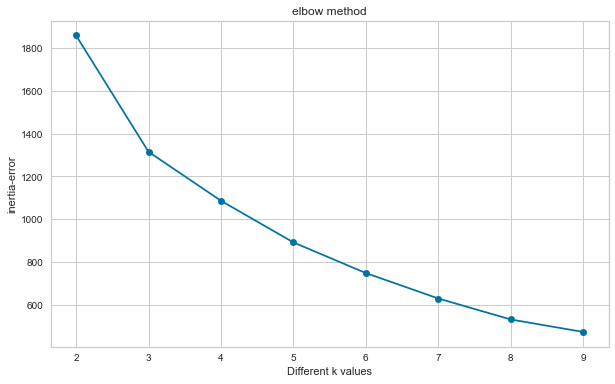

In [389]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [390]:
ssd # sum of squared distance

[1859.0625384171951,
 1315.1832957473466,
 1086.4623836138348,
 891.6908877280879,
 748.4490174195082,
 629.5170586722027,
 531.5874249413728,
 473.2005449170381]

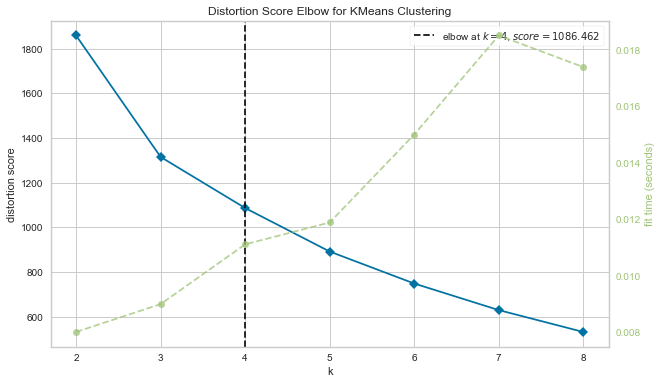

In [391]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

In [392]:
from sklearn.metrics import silhouette_score

In [393]:
silhouette_score(X, K_means_model.labels_)

0.2116509177618026

In [394]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8576595986314113
For n_clusters=3, the silhouette score is 0.8120407283182978
For n_clusters=4, the silhouette score is 0.5527890687752317
For n_clusters=5, the silhouette score is 0.4774737567377792
For n_clusters=6, the silhouette score is 0.45587086521973347
For n_clusters=7, the silhouette score is 0.43587678919276585
For n_clusters=8, the silhouette score is 0.4352531486310629


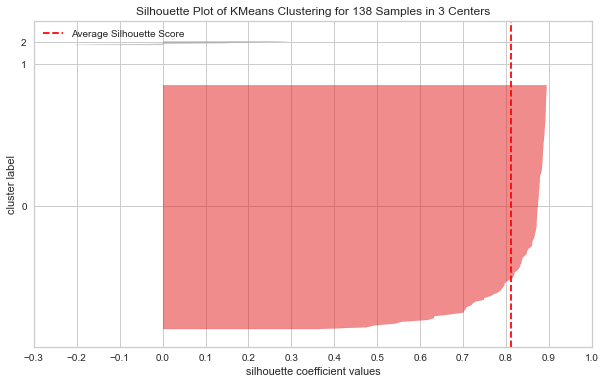

In [395]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

### Model Building and label visualisation

In [396]:
model = KMeans(n_clusters =4, random_state=42)
model.fit(X)

KMeans(n_clusters=4, random_state=42)

In [397]:
model.inertia_

1086.4623836138348

In [398]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1,
       1, 1, 1, 1, 1, 1])

### Evaluate 

In [399]:
data["cluster"] = model.labels_

In [400]:
clusters = model.labels_

In [401]:
print(f'Silhouette Score(n=4): {silhouette_score(X, data.cluster)}')

Silhouette Score(n=4): 0.5527890687752317


In [402]:
den = pd.DataFrame(X,columns=data.drop(["Country","cluster"],axis=1).columns)
den["cluster"] = data["cluster"]

clus_pred = den.groupby("cluster").mean().T
clus_pred

cluster,0,1,2,3
Military Strength Power Index,-1.061327,0.138047,-0.771627,-1.055263
Airforce Strength_Aircraft Strength value,10.489144,-0.200713,0.460089,2.686763
Airforce Strength_Fighter/Interceptor Strength value,8.729991,-0.241129,0.662442,4.230860
Airforce Strength_Attack Aircraft Strength value,7.317921,-0.199012,0.287959,5.635064
Airforce Strength_Transport Aircraft Fleet Strength value,9.943640,-0.186760,0.335732,3.193295
Airforce Strength_Trainer Aircraft Fleet value,10.670489,-0.201307,0.611413,1.344839
Airforce Strength_Helicopter Fleet Strength value,10.831533,-0.181457,0.381215,2.049863
Airforce Strength_Attack Helicopter Fleet Strength value,9.707636,-0.188899,0.278675,3.922510
Land Strength_Tank Strength value,3.736804,-0.251222,0.933501,5.018954
Land Strength_AFV/APC Strength value,6.820244,-0.263903,0.829743,5.107360


## Hierarchical Clustering

### Dendogram

### Model Building and label visualisation

### Evaluate 